In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv(r"C:\Users\DHONI HANIF\OneDrive\Documents\AI Sales Cross Selling and UpSelling\data\dataset\Finance Series.csv")
df.head()

,Unnamed: 0,company_ID,company_name,company_pic,company_address,company_phone,company_email,company_field,transaction_date,level_training_process,...,trainer_name,training_price,discount_training,satisfaction_level,training_session,number_of_participant,training_field,training_name,cross_selling,upselling
0,0,P0001,Tribakti Inspektama,Lasmanto Pratiwi,"Jalan Cihampelas No. 282\nPontianak, Kalimanta...",+62 (183) 655 1415,muhammadnasyidah@example.org,Aktivitas Keuangan dan Asuransi,2020-01-01,5,...,Ibun,6000000.0,50,5,17,19,Finance Series,Industry Forecasting & Business Valuation Work...,Cash Flow & Credit Management,Industry Forecasting & Business Valuation Work...
1,1,P0002,Bank Bukopin Syariah,Puti Gina Napitupulu,"Jalan Tubagus Ismail No. 02\nSukabumi, BB 74318",(097) 773 7113,januarkamaria@example.net,Aktivitas Badan Internasional Dan Badan Ekstra...,2020-01-02,5,...,Reza,6000000.0,50,5,17,19,Finance Series,Industry Forecasting & Business Valuation Work...,Cash Flow & Credit Management,Industry Forecasting & Business Valuation Work...
2,2,P0003,Bank Bukopin Syariah,"Karna Purwanti, S.I.Kom","Gg. Pelajar Pejuang No. 660\nJambi, Jambi 60449",+62 (0801) 007-5669,rprasetyo@example.net,"Pengadaan Listrik, Gas, Uap/Air Panas Dan Udar...",2020-01-03,5,...,Ibun,5500000.0,50,5,16,18,Finance Series,Industry Forecasting & Business Valuation Work...,Finance For Non Finance Executive,Industry Forecasting & Business Valuation Work...
3,3,P0004,Kementrian Agama,Tania Yolanda,"Jl. Cihampelas No. 8\nTual, ST 59647",+62-0247-253-2150,iswahyudiraisa@example.net,Konstruksi,2020-01-04,5,...,Reza,6000000.0,50,5,17,19,Finance Series,Industry Forecasting & Business Valuation Work...,Cash Flow & Credit Management,Industry Forecasting & Business Valuation Work...
4,4,P0005,M3kom,Zaenab Anggriawan,"Gang Moch. Ramdan No. 083\nPayakumbuh, SS 13214",(025) 406 2520,mulyono67@example.com,Informasi Dan Komunikasi,2020-01-05,5,...,Haris,6000000.0,50,5,17,19,Finance Series,Industry Forecasting & Business Valuation Work...,Cash Flow & Credit Management,Industry Forecasting & Business Valuation Work...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 35 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   5000 non-null   int64  
 1   company_ID                                   5000 non-null   object 
 2   company_name                                 5000 non-null   object 
 3   company_pic                                  5000 non-null   object 
 4   company_address                              5000 non-null   object 
 5   company_phone                                5000 non-null   object 
 6   company_email                                5000 non-null   object 
 7   company_field                                5000 non-null   object 
 8   transaction_date                             5000 non-null   object 
 9   level_training_process                       5000 non-null   int64  
 10  

In [4]:
for i in df.columns:
    if df[i].dtype == "object":
        df[i] = df[i].astype("category")

df.drop("cross_selling", axis=1, inplace=True)

In [5]:
X = df.drop("upselling", axis=1)
y = df["upselling"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model = joblib.load("./pipeline_save/pipeline4.joblib")

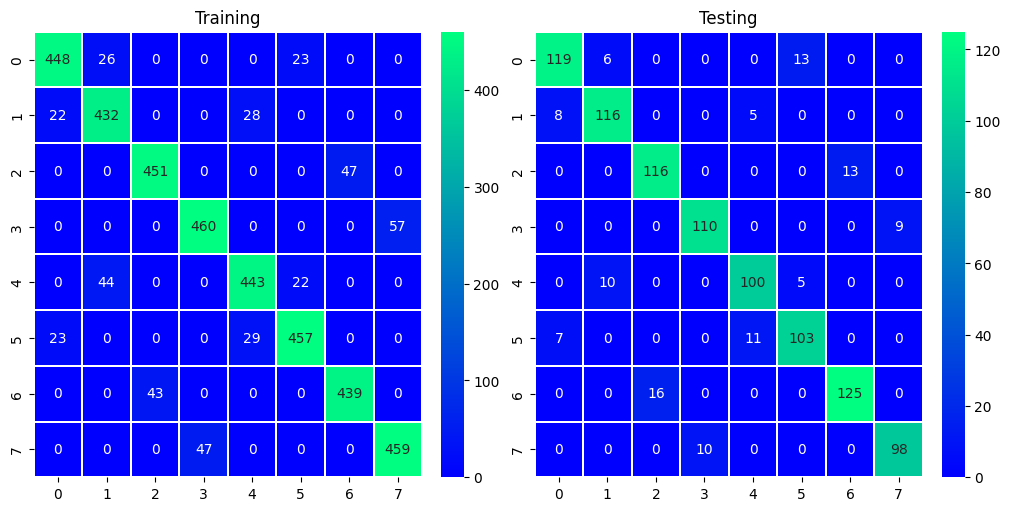

In [6]:
y_pred = model.predict(X_test)
fig, ax = plt.subplots(1, 2, figsize=(10, 5), layout="constrained")
sns.heatmap(confusion_matrix(y_train, model.predict(X_train)), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[0])
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", linecolor="white", linewidths=0.2, cmap="winter", ax=ax[1])

ax[0].set_title("Training")
ax[1].set_title("Testing")
plt.show()


In [7]:
print(classification_report(y_test, y_pred))

                                                                                                       precision    recall  f1-score   support

                                                              Actuarial Calculation Of The Risk Value       0.89      0.86      0.88       138
                                                                           Akuntansi Keuangan Syariah       0.88      0.90      0.89       129
                                                                        Cash Flow & Credit Management       0.88      0.90      0.89       129
                                                                     Finance Credit: Rating & Scoring       0.92      0.92      0.92       119
                                                                    Finance For Non Finance Executive       0.86      0.87      0.87       115
Fintech: Solusi Teknologi Keuangan Bagi Perputaran Ekonomi Skala Kecil Yang Menghasilkan Bisnis Besar       0.85      0.85      0.85       12

In [8]:
a = model.predict_proba(X_test.iloc[-1:, :])
b = ["Actuarial Calculation Of The Risk Value", "Akuntansi Keuangan Syariah", "Cash Flow & Credit Management"
     "Finance Credit: Rating & Scoring", "Finance For Non Finance Executive",
     "Fintech: Solusi Teknologi Keuangan Bagi Perputaran Ekonomi Skala Kecil Yang Menghasilkan Bisnis Besar",
     "Industry Forecasting & Business Valuation Workshop Start Up & Conventional Business", "International Banking Facility"
     ]

for i, j in zip(b, a.ravel()):
    print(i, f"{j*100:.2f}%")

Actuarial Calculation Of The Risk Value 7.32%
Akuntansi Keuangan Syariah 7.12%
Cash Flow & Credit ManagementFinance Credit: Rating & Scoring 7.34%
Finance For Non Finance Executive 45.96%
Fintech: Solusi Teknologi Keuangan Bagi Perputaran Ekonomi Skala Kecil Yang Menghasilkan Bisnis Besar 7.49%
Industry Forecasting & Business Valuation Workshop Start Up & Conventional Business 7.49%
International Banking Facility 7.11%


In [9]:
model.predict(X_test.iloc[-1:, :])

array(['Finance Credit: Rating & Scoring'], dtype=object)

In [10]:
X_test.iloc[-1].to_dict

<bound method Series.to_dict of Unnamed: 0                                                                                  1926
company_ID                                                                                 P1927
company_name                                                                      PD Dabukke Tbk
company_pic                                                                        Gantar Waluyo
company_address                                Gg. Tebet Barat Dalam No. 32\nPrabumulih, SN 9...
company_phone                                                                     (073) 225-8473
company_email                                                         usadacakrajiya@example.org
company_field                                  Aktivitas Badan Internasional Dan Badan Ekstra...
transaction_date                                                                      2025-04-10
level_training_process                                                                         